In [0]:
import numpy as np
import pandas as pd
#from pandas_profiling import ProfileReport
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

from IPython.core.display import display, HTML
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

In [0]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 5.9 MB/s 
     |██▏       

*** WARNING: max output size exceeded, skipping output. ***

     |████████████████████████████████| 31.2 MB 18.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


In [0]:
!pip install wordcloud

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
     |████████████████████████████████| 458 kB 5.9 MB/s 
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


In [0]:
df = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/sravanithota96@gmail.com/groceries___groceries-2.csv")

Out[58]: 33

In [0]:
df = df.select("*").toPandas()

In [0]:
#df.drop('Item(s)', inplace=True, axis = 1)

In [0]:
df.head(5)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [0]:
headers = []
for i in range(1,33):
    headers.append('item '+str(i))

df.columns = headers

In [0]:
df.head(5)

,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,item 17,item 18,item 19,item 20,item 21,item 22,item 23,item 24,item 25,item 26,item 27,item 28,item 29,item 30,item 31,item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


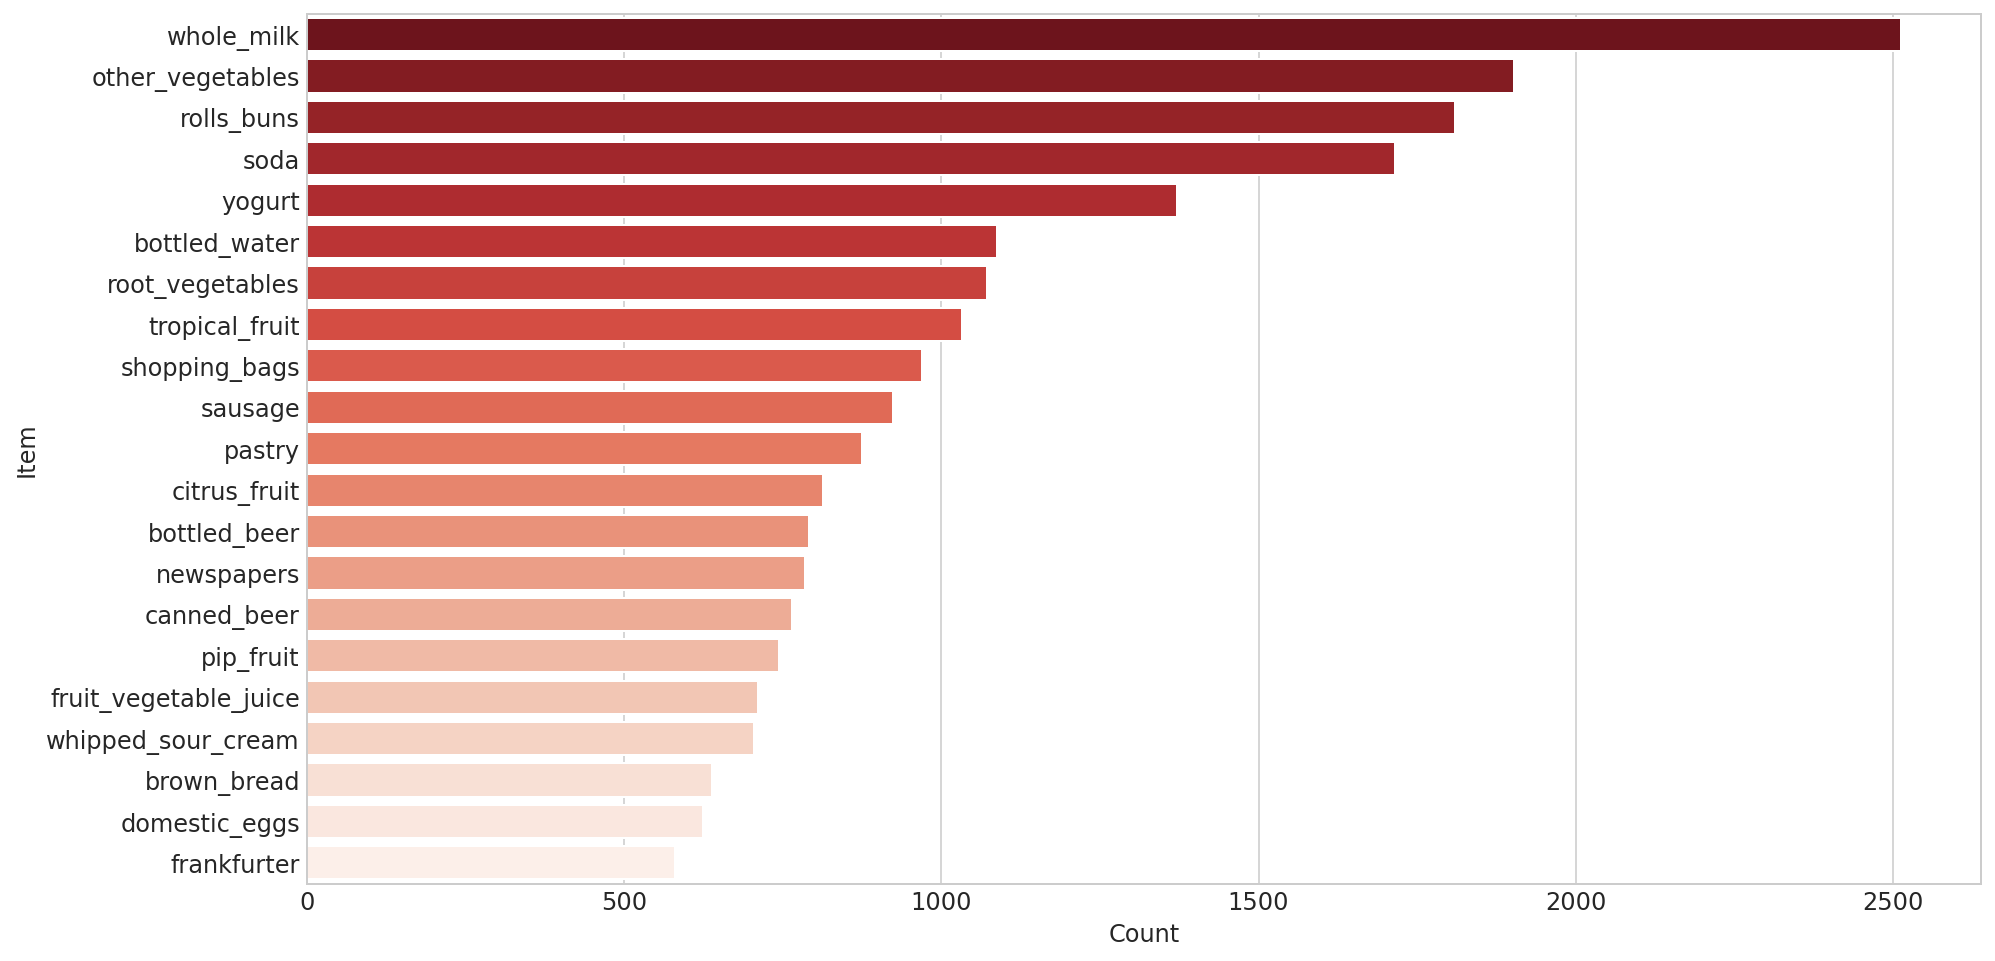

In [0]:
df_plot.columns = ['Item','Count']
df_plot['Item'] = df_plot['Item'].astype(str)
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.barplot(y='Item', x='Count', data=df_plot[:21], palette='Reds_r');

In [0]:
df_plot.astype(str).head()

,Item,Count
0,"['rolls/buns', 'sausage', 'soda']",10
1,"['bottled beer', 'liquor', 'red/blush wine']",5
2,"['pastry', 'rolls/buns', 'soda']",4
3,"['rolls/buns', 'sausage', 'whole milk']",4
4,"['bottled beer', 'liquor', 'red/blush wine', '...",4


In [0]:
text = [item for sublist in text for item in sublist]
text = [w.replace(' ', '_') for w in text]
text = [w.replace('/', '_') for w in text]
text.sort()
text[:10]

Out[96]: ['Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products']

In [0]:
pd.Series(text).value_counts()

Out[97]: whole_milk                   2513
other_vegetables             1903
rolls_buns                   1809
soda                         1715
yogurt                       1372
bottled_water                1087
root_vegetables              1072
tropical_fruit               1032
shopping_bags                 969
sausage                       924
pastry                        875
citrus_fruit                  814
bottled_beer                  792
newspapers                    785
canned_beer                   764
pip_fruit                     744
fruit_vegetable_juice         711
whipped_sour_cream            705
brown_bread                   638
domestic_eggs                 624
frankfurter                   580
margarine                     576
coffee                        571
pork                          567
butter                        545
curd                          524
beef                          516
napkins                       515
chocolate                     488
froze

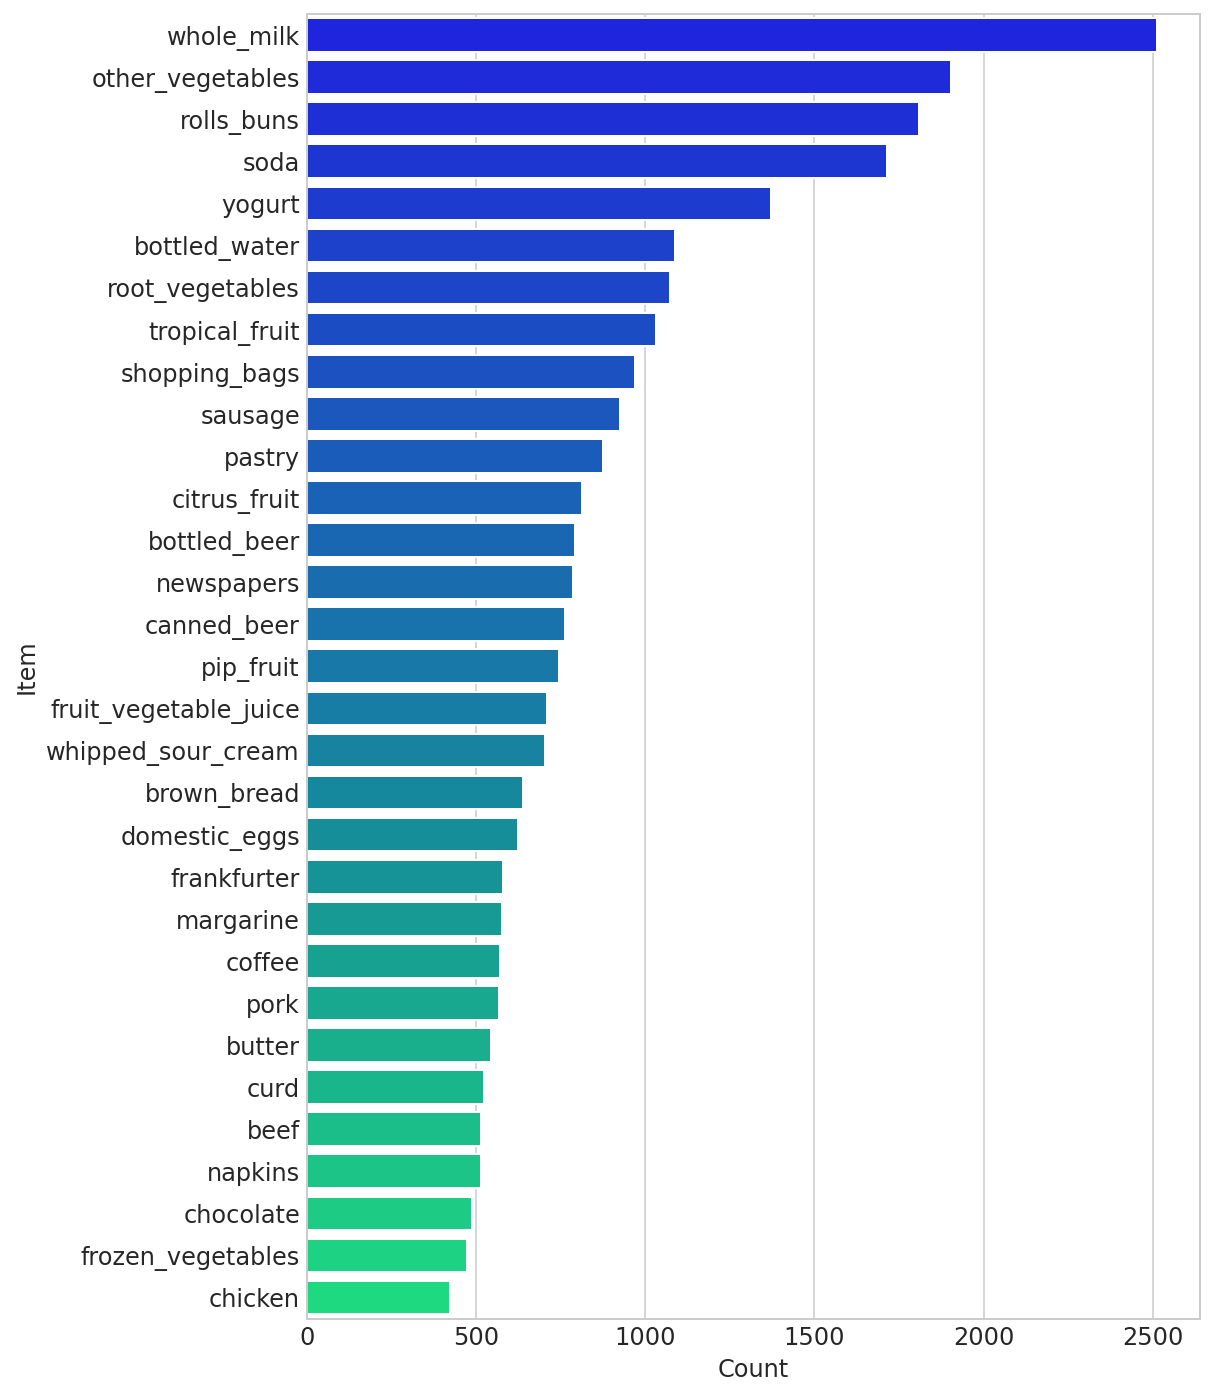

In [0]:
df_plot = pd.DataFrame(pd.Series(text).value_counts()).reset_index()
df_plot.columns = ['Item','Count']
sns.set_style('whitegrid')
plt.figure(figsize=(8,12))
sns.barplot(y='Item', x='Count', data=df_plot[:31], palette='winter');

There are 43,367 items


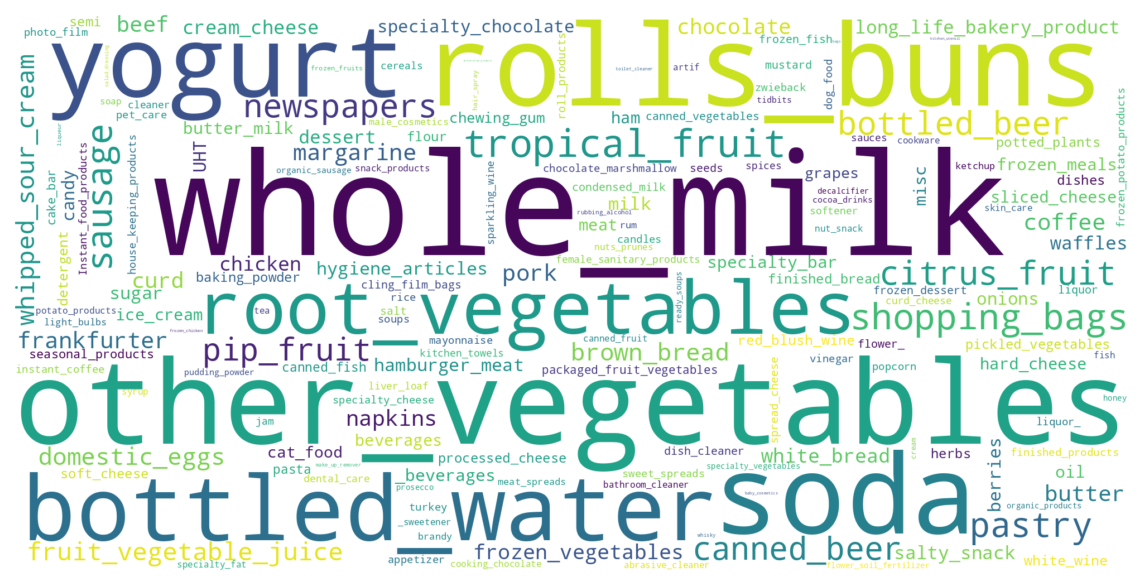

In [0]:
nr_words = '{:,}'.format(len(text))
print ("There are",nr_words,"items",)


wordcloud = WordCloud(background_color="white",width=2000, height=1000,max_words=500,collocations=False, contour_color='firebrick').generate(" ".join(text))
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
sentences = []
for i, row in df.iterrows():
    vals = row.values[1:].astype(str)
    
    # Remove the nans
    vals = vals[vals != 'nan']
    
    # Order does not really matter in shopping baskets (unlike English sentences)
    # so this is a form of augmentation
    for _ in range(min(3, len(vals))):
        np.random.shuffle(vals)
        sentences.append(list(vals))
        
print('\n'.join([', '.join(x) for x in sentences[:10]]))

margarine, semi-finished bread, ready soups
semi-finished bread, margarine, ready soups
margarine, ready soups, semi-finished bread
coffee, yogurt
coffee, yogurt
cream cheese, yogurt, meat spreads
cream cheese, yogurt, meat spreads
meat spreads, yogurt, cream cheese
condensed milk, whole milk, long life bakery product
whole milk, long life bakery product, condensed milk


In [0]:
transactions = df.values.astype(str).tolist()
transactions = [[item for item in row if item != 'None'] for row in transactions]
transactions[:5]

Out[105]: [['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [0]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [0]:
df.head(5)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit/vegetable juice,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,kitchen utensil,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,make up remover,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,napkins,newspapers,nut snack,nuts/prunes,oil,onions,organic products,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,photo/film,pickled vegetables,pip fruit,popcorn,pork,potato products,potted plants,preservation products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Tr

In [0]:
df.shape

Out[108]: (9835, 169)

In [0]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [0]:
frequent_itemsets.count()['itemsets']

Out[110]: 333

In [0]:
frequent_itemsets.nlargest(n = 20, columns = 'support')

,support,itemsets
86,0.255516,(whole milk)
55,0.193493,(other vegetables)
66,0.183935,(rolls/buns)
75,0.174377,(soda)
87,0.139502,(yogurt)
6,0.110524,(bottled water)
67,0.108998,(root vegetables)
81,0.104931,(tropical fruit)
73,0.098526,(shopping bags)
70,0.093950,(sausage)


Out[135]: <AxesSubplot:xlabel='support', ylabel='itemsets'>

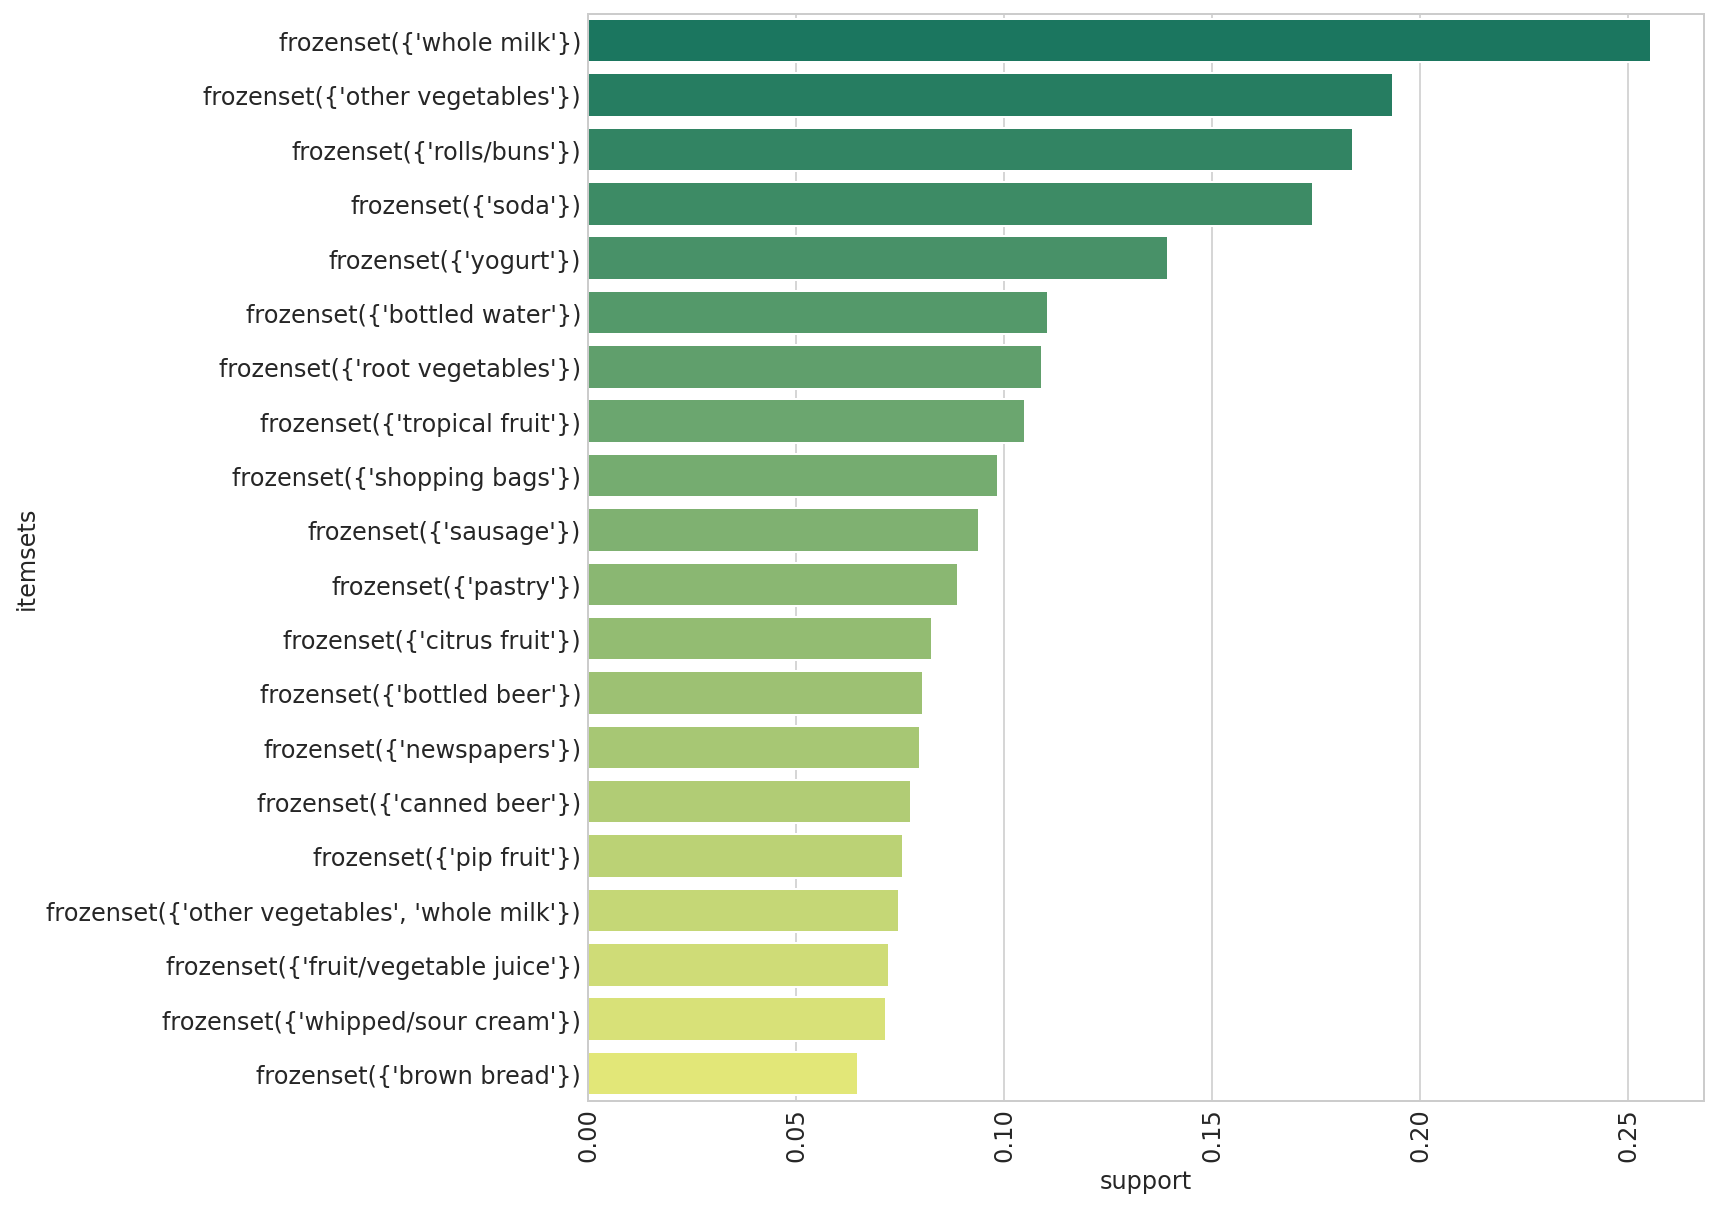

In [0]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(y='itemsets', x='support', data=frequent_itemsets.nlargest(n = 20, columns = 'support'),palette='summer')

In [0]:
rules_plot_lift = []
for conf in np.linspace(0,4,20):
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=conf)
    rules_plot_lift.append(len(rules))

Out[151]: Text(0, 0.5, 'nr of rules')

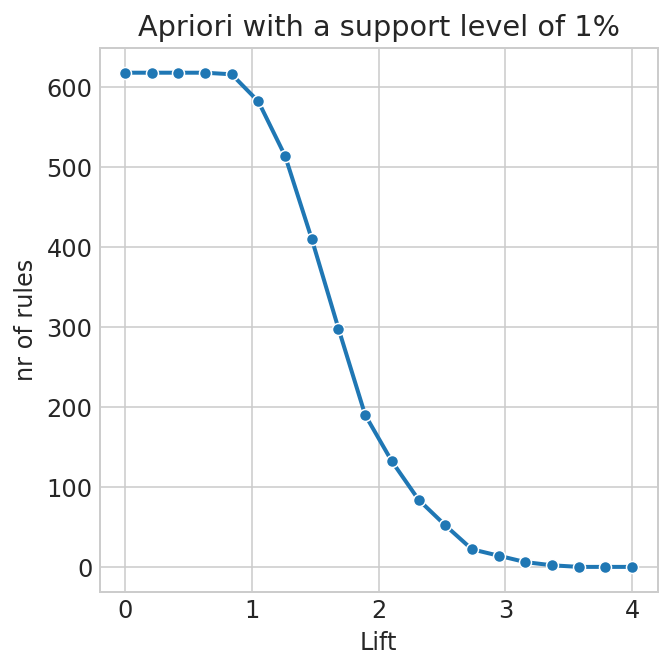

In [0]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=5,5 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
sns.lineplot(x=np.linspace(0,4,20),
             y=rules_plot_lift,
             marker='o')
plt.title("Apriori with a support level of 1%")
plt.xlabel('Lift')
plt.ylabel('nr of rules')

In [0]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules.sort_values(by=['confidence'], ascending=False).head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
6,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
2,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
0,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
11,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
12,"(yogurt, root vegetables)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594
3,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694
14,"(yogurt, whipped/sour cream)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
10,"(root vegetables, rolls/buns)",(whole milk),0.024301,0.255516,0.012710,0.523013,2.046888,0.006500,1.560804
4,"(pip fruit, other vegetables)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003


In [0]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))
rules['rule'] = rules.index
rules.drop(['antecedent support','consequent support','conviction','antecedent_len','consequent_len'],axis=1).sort_values(by=['confidence'], ascending=False).head(100)

,antecedents,consequents,support,confidence,lift,leverage,rule
1,"(root vegetables, citrus fruit)",(other vegetables),0.010371,0.586207,3.029608,0.006948,1
6,"(root vegetables, tropical fruit)",(other vegetables),0.012303,0.584541,3.020999,0.008231,6
2,"(yogurt, curd)",(whole milk),0.010066,0.582353,2.279125,0.005649,2
0,"(butter, other vegetables)",(whole milk),0.011490,0.573604,2.244885,0.006371,0
11,"(root vegetables, tropical fruit)",(whole milk),0.011998,0.570048,2.230969,0.006620,11
12,"(yogurt, root vegetables)",(whole milk),0.014540,0.562992,2.203354,0.007941,12
3,"(domestic eggs, other vegetables)",(whole milk),0.012303,0.552511,2.162336,0.006613,3
14,"(yogurt, whipped/sour cream)",(whole milk),0.010880,0.524510,2.052747,0.005580,14
10,"(root vegetables, rolls/buns)",(whole milk),0.012710,0.523013,2.046888,0.006500,10
4,"(pip fruit, other vegetables)",(whole milk),0.013523,0.517510,2.025351,0.006846,4


In [0]:
rules.drop(['antecedent support','consequent support','conviction','antecedent_len','consequent_len'],axis=1)[rules['antecedent_len'] >= 2].head(20)

,antecedents,consequents,support,confidence,lift,leverage,rule
0,"(butter, other vegetables)",(whole milk),0.011490,0.573604,2.244885,0.006371,0
1,"(root vegetables, citrus fruit)",(other vegetables),0.010371,0.586207,3.029608,0.006948,1
2,"(yogurt, curd)",(whole milk),0.010066,0.582353,2.279125,0.005649,2
3,"(domestic eggs, other vegetables)",(whole milk),0.012303,0.552511,2.162336,0.006613,3
4,"(pip fruit, other vegetables)",(whole milk),0.013523,0.517510,2.025351,0.006846,4
5,"(root vegetables, rolls/buns)",(other vegetables),0.012201,0.502092,2.594890,0.007499,5
6,"(root vegetables, tropical fruit)",(other vegetables),0.012303,0.584541,3.020999,0.008231,6
7,"(yogurt, root vegetables)",(other vegetables),0.012913,0.500000,2.584078,0.007916,7
8,"(whipped/sour cream, other vegetables)",(whole milk),0.014642,0.507042,1.984385,0.007263,8
9,"(yogurt, other vegetables)",(whole milk),0.022267,0.512881,2.007235,0.011174,9


In [0]:
rules.sort_values(['confidence']).head()
G = nx.from_pandas_edgelist(rules,
                            source='antecedents',
                            target='consequents',
                            edge_attr='confidence'
                            # edge_attr=True
                           )

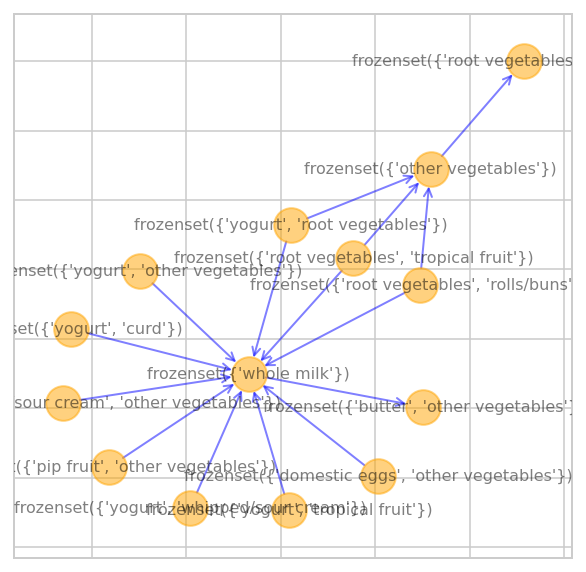

In [0]:
import networkx as nx

nx.draw_networkx(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='summer',
                 alpha=0.5,
                 edge_color='blue',
                 font_size=8,
                 node_color='Orange'

                )

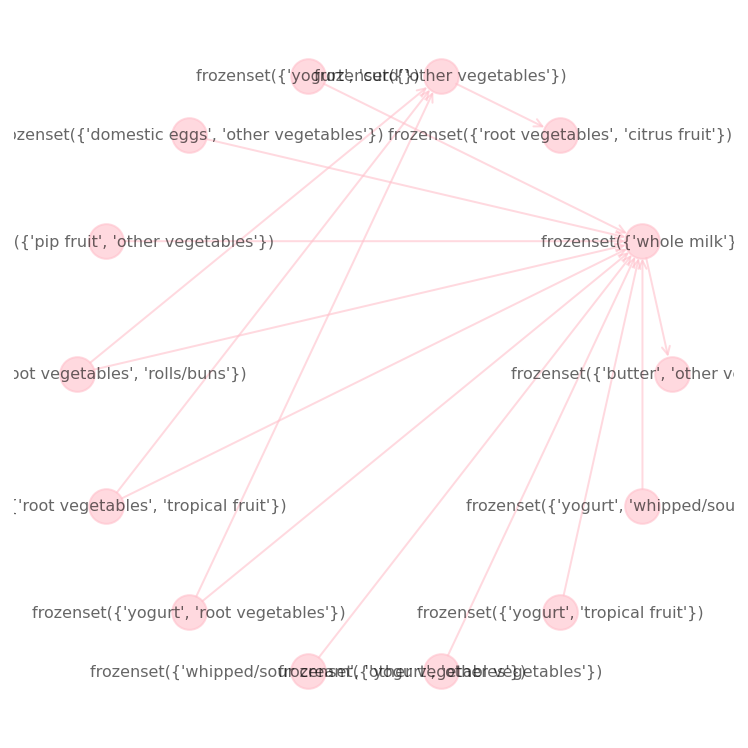

In [0]:

nx.draw_circular(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='cividis',
                 alpha=0.6,
                 edge_color='Pink',
                 font_size=8,
                 node_color='Pink'
                )

In [0]:
Dairy products (such as whole milk, yogurt, curd, butter, and cream) are often associated with vegetable and fruit products (such as other vegetables, frozen vegetables, root vegetables, citrus fruit, and tropical fruit). It seems that it makes sense to put the dairy products close to the vegetables and fruits if it is the intent of the store owner only to sell those items. In practice however, these items are usually put at opposite ends of a store to encourage more browsing in between within the isles that could lead to more purchases.

In [0]:
!pip install networkx

     |████████████████████████████████| 2.0 MB 7.1 MB/s 
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.
